In [3]:
import cv2
from matplotlib import pyplot as plot
image_file="cap.jpg"
img=cv2.imread(image_file)

In [ ]:
cv2.imshow("orginal image",img)
cv2.waitKey(0)

In [30]:
def display(im_path):
    dpi=80
    im_data=plot.imread(im_path)
    height,width =im_data.shape
    #depth a ajouter si on change le format de l'image
    figsize=width/ float(dpi),height/ float(dpi)
    #
    fig=plot.figure(figsize=figsize)
    ax=fig.add_axes([0,0,1,1])
    #
    ax.axis('off')
    #
    ax.imshow(im_data,cmap='gray')
    plot.show()

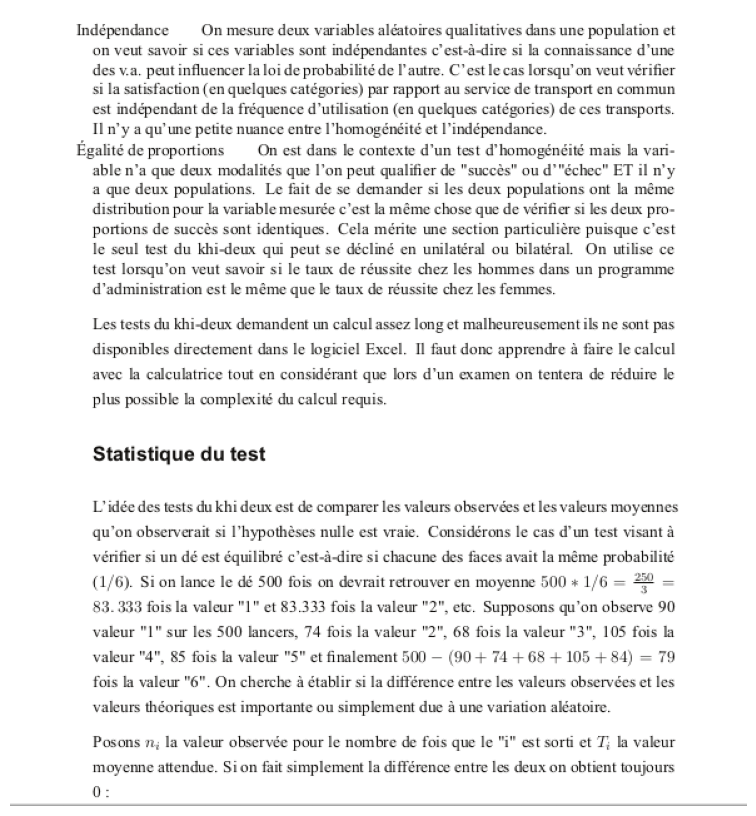

In [13]:
display("cap.jpg")

In [31]:

inverted_image=cv2.bitwise_not(img)
cv2.imwrite("inverted.jpg",inverted_image)




True

In [32]:
def grayscale(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


In [33]:

gray_image=grayscale(img)
cv2.imwrite("gray.jpg",gray_image)

True

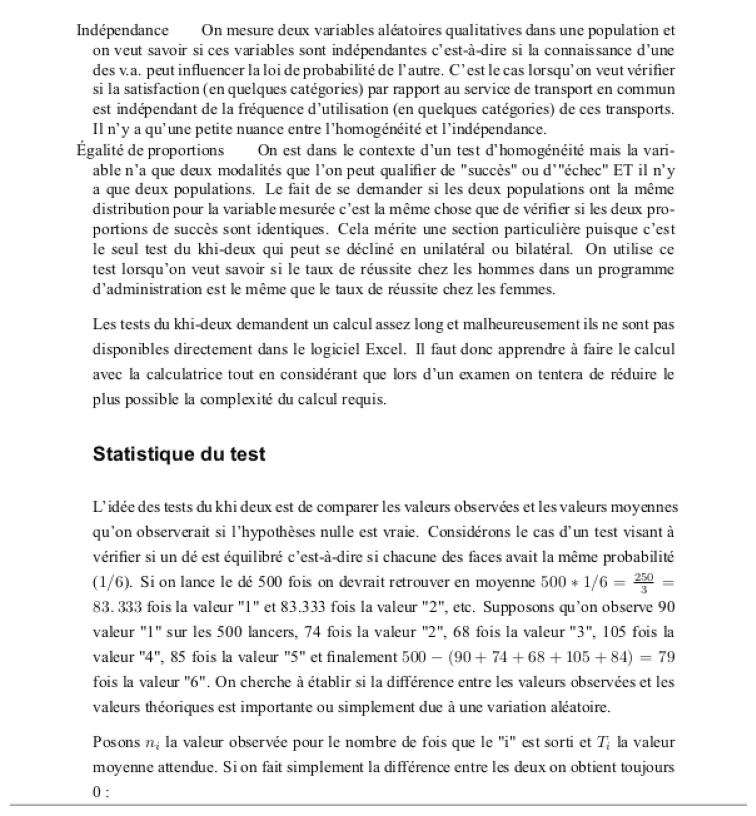

In [34]:
display("gray.jpg")

In [41]:
thresh,im_bw=cv2.threshold(gray_image,210,230,cv2.THRESH_BINARY)
cv2.imwrite("./bw_image.jpg",im_bw)

True

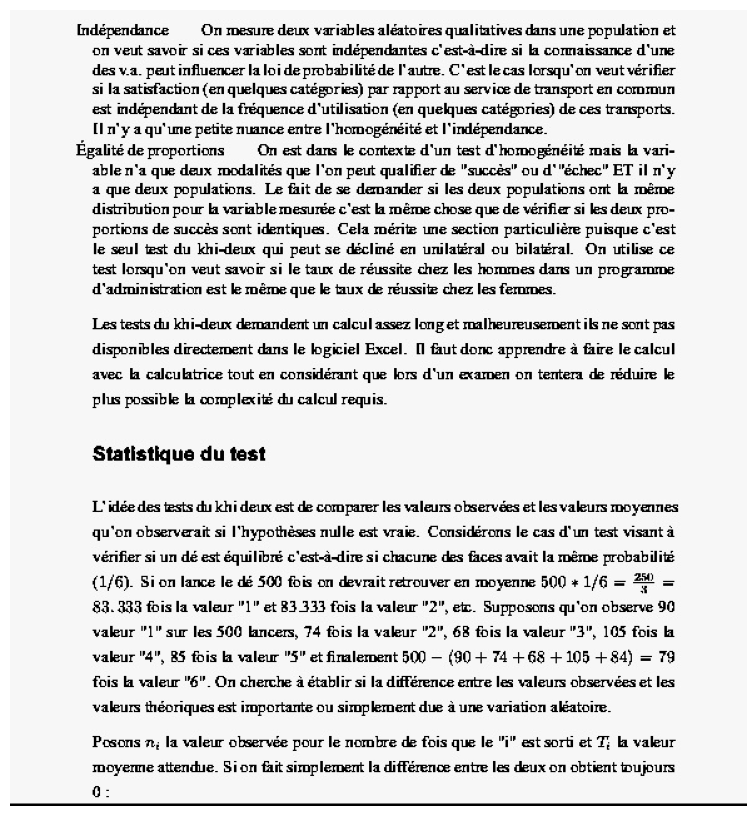

In [42]:
display("./bw_image.jpg")

In [111]:
def noise_removal(image):
    import numpy as np
    kernel=np.ones((1,1),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel=np.ones((1,1),np.uint8)
    image=cv2.erode(image,kernel,iterations=1)
    image=cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel)
    image=cv2.medianBlur(image,3)
    return (image)


In [112]:
no_noise=noise_removal(im_bw)
cv2.imwrite("./no_noise.jpg",no_noise)

True

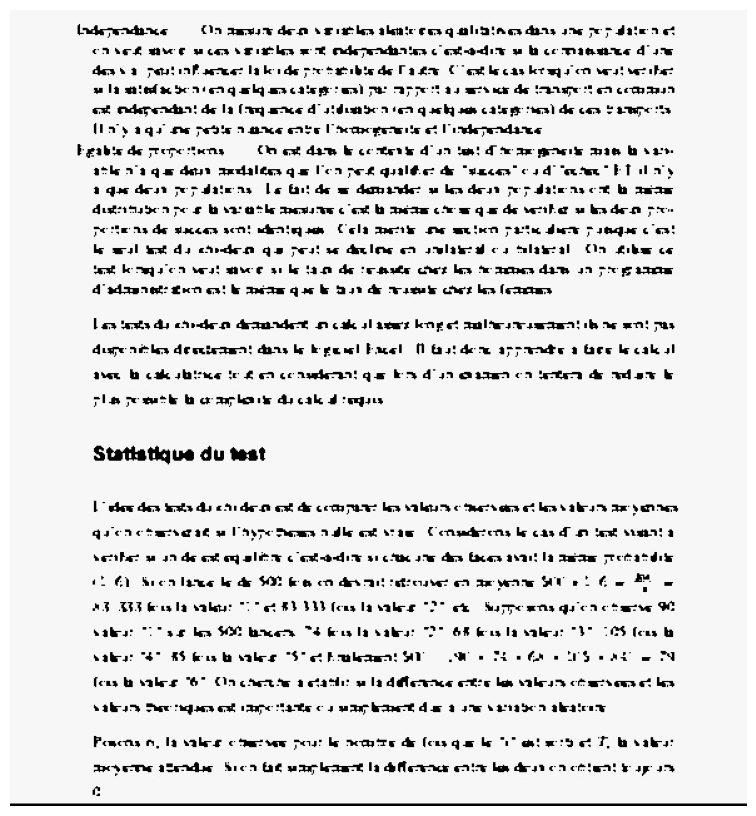

In [113]:
display("./no_noise.jpg")

In [114]:
def thin_font(image):
    import numpy as np
    image=cv2.bitwise_not(image)
    kernel=np.ones((1,1),np.uint8)
    image=cv2.erode(image,kernel,iterations=1 )
    image=cv2.bitwise_not(image)
    return(image)



In [115]:
eroded_image=thin_font(no_noise)
cv2.imwrite("./eroded_image.jpg",eroded_image)

True

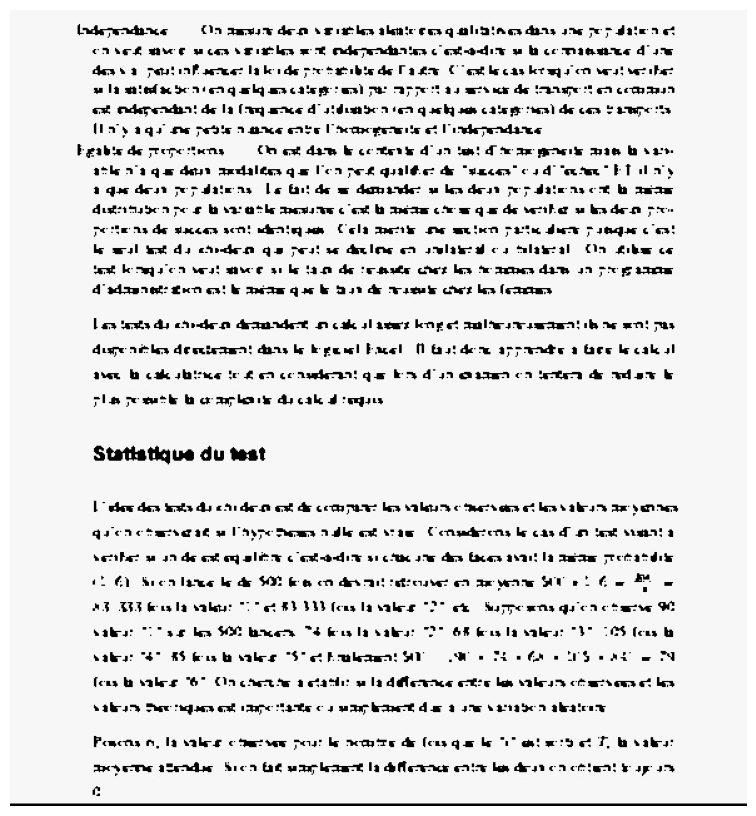

In [116]:
display("eroded_image.jpg")

In [117]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)


In [118]:
dilated_image=thick_font(eroded_image)
cv2.imwrite("./dilated_image.jpg",dilated_image)

True

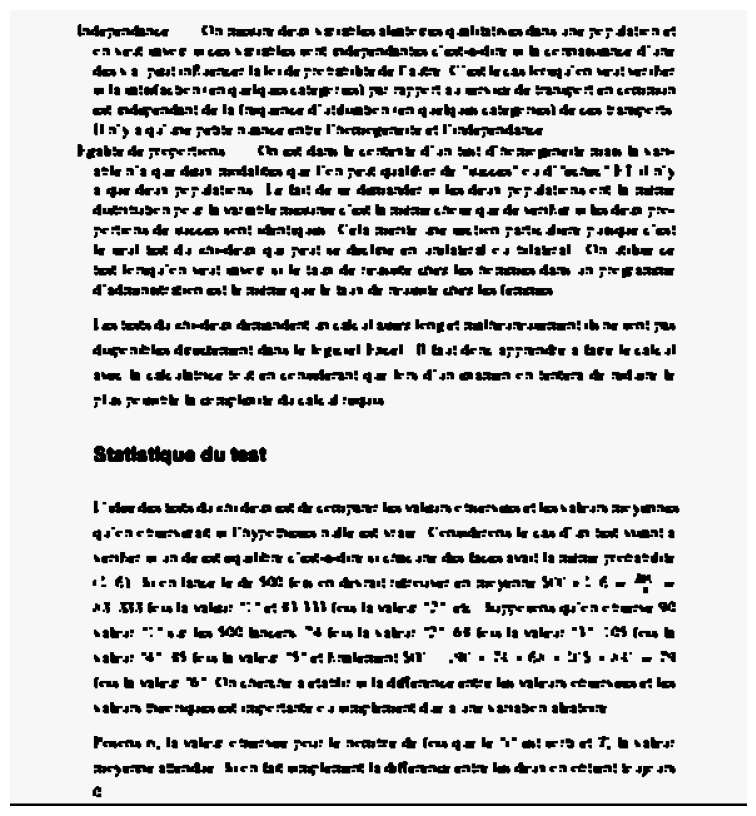

In [119]:
display("./dilated_image.jpg")

In [120]:
import numpy as np
def getAngle(cvImage)-> float:
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle



In [132]:
def rotateImage(cvImage,angle:float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage



In [139]:
def deskew(cvImage):
    angle = getAngle(cvImage)
    
    return rotateImage(cvImage, -1.0 * angle)


In [154]:


# fixed = deskew(cvImage)
# cv2.imwrite("./fixed.jpg", fixed)



In [155]:
# display("./fixed.jpg")

In [149]:
def remove_border(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)



In [156]:
no_borders=remove_border(no_noise)
# cv2.imwrite("./no_borders.jpg",no_border)

In [ ]:
display("./no_borders.jpg")

In [151]:
color=[255,255,255]
top,bottom,left,right=[150]*4

In [153]:
image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite("temp/image_with_border.jpg", image_with_border)




False

In [ ]:
display("temp/image_with_border.jpg")